In [1]:
%matplotlib inline

In [2]:
from PIL import Image, ImageFilter, ImageOps

import numpy as np
from matplotlib import pyplot as plt

from collections import deque

from cnocr import CnOcr

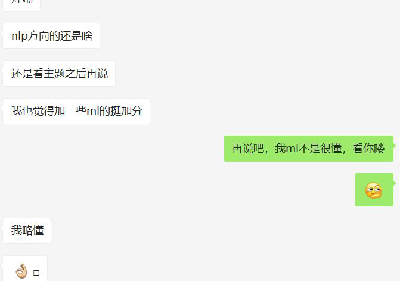

In [3]:
#Read image
filepath = "Capture.JPEG"
im = Image.open( filepath )

im = im.convert("RGB")

resizeW = 400

W = im.width
H = im.height

im = im.resize((resizeW,int(H/W*resizeW)))
W = im.width
H = im.height
im = im.crop((0,H*0.08,W,H-H*0.05))

im

In [4]:





# im_invert = ImageOps.invert(im)
new_im = im.convert('L')
g_im = np.array(new_im)
res_im = np.array(new_im)

# print(new_im.getpixel((0,0)))

W = im.width
H = im.height
 

In [5]:


c_count = []
 
percentagelog = []
for c in range(g_im.shape[1]):
    count = 0
    for r in range(g_im.shape[0]):
        if abs(g_im[r,c]-243)<5:#43
            count+=1
    if count/H > 0.95:
        c_count.append( c)
    percentagelog.append(count/H)

pcl = percentagelog

cropleft = 0
for i in range(3,int(len(pcl)/5)):
    if (pcl[i-1]+pcl[i-2])/2-(pcl[i]+pcl[i+1])/2>0.05:
        cropleft=i
cropright = W
for i in range(len(pcl)-3,int(len(pcl)*4/5),-1):
    if (pcl[i]+pcl[i+1])/2-(pcl[i-1]+pcl[i-2])/2>0.05:
        cropright=i
    
    


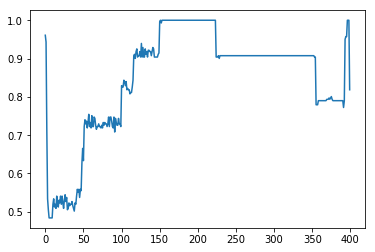

In [6]:
plt.plot(percentagelog)

In [7]:
# Image.fromarray(res_im)

In [8]:
# last = 0
# for i in c_count:
#     if i>W*4/5 and last <W/5:
#         print(i,last)
#         cropright,cropleft = i,last
#     last = i


In [9]:
cropim = im.crop((cropleft,0,cropright,H))
c_im = np.array(cropim)
c_im2 = np.array(cropim)


CW = cropim.width
CH = cropim.height

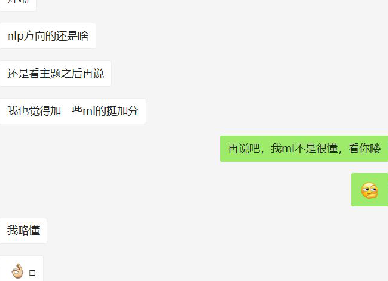

In [10]:
cropim


In [11]:








# def is_valid(gridsize, vector, vis):
#     max_r,max_c = gridsize
#     r,c = vector
#     if r<0 or r>=max_r or c<0 or c>=max_c:
#         return False
#     if vector in vis:
#         return False
#     return True
    

# def BFS(grid, start):
#     directions = (
#         (-1,0),
#         (1,0),
#         (0,-1),
#         (0,1)
#     )
   
#     vis = []
#     q = []
#     r,c = start
    
#     min_r,min_c,max_r,max_c = r,c,r,c
    
#     vis.append(start)
#     q.append(start)
    
#     while q:
#         r,c = current = q.pop(0)
#         vis.append(current)
#         for d in directions:
#             newvec = (r+d[0],c+d[1])
#             if is_valid(grid.shape, newvec, vis) and not newvec in q and grid[newvec] == 1:
#                 q.append((r+d[0],c+d[1]))
# #         print(r,c)
#         if r>max_r: max_r = r
#         if c>max_c: max_c = c
#         if r<min_r: min_r = r
#         if c<min_c: min_c = c
    
#     return min_r,min_c,max_r,max_c
    
# # grid = np.array([[0,0,0],
# #                  [0,1,1],
# #                  [0,1,0],
# #                  [0,1,1]])

# # BFS(bitmap,(230,200))
            



In [12]:
# bitmap[230,200]

In [13]:
# def fillarr(arr,vec1,vec2):
#     r1,c1 = vec1
#     r2,c2 = vec2
#     for rnum,r in enumerate(arr):
#         for cnum,c in enumerate(r):
#             if r1<=rnum<=r2 and c1<=cnum<=c2:
#                 arr[rnum,cnum]=2
# #                 print(rnum,cnum)

# def fillim(arr,vec1,vec2):
#     r1,c1 = vec1
#     r2,c2 = vec2
#     for rnum,r in enumerate(arr):
#         for cnum,c in enumerate(r):
#             if r1<=rnum<=r2 and c1<=cnum<=c2:
#                 arr[rnum,cnum]=np.array([151,235,116])

# # fillarr(grid,(1,1),(3,2))

# # grid
    
    
    

In [14]:
# dist = numpy.linalg.norm(a-b)

bitmap = np.zeros((CH,CW))

for r in range(CH):
    count = 0
    for c in range(CW):
        color = c_im[r,c]
        if np.linalg.norm(color-np.array((151,235,116)))<25:
            c_im2[r,c] = (0,0,0)
            bitmap[r,c] = 1

In [15]:
# rnum,cnum = 0,0
# while rnum<bitmap.shape[0]:
#     cnum=0
#     while cnum<bitmap.shape[1]:

# #         if rnum == 700 and cnum==500:print('wtf')
#         if bitmap[rnum,cnum]!=0:
# #             print('yo')
#             min_r,min_c,max_r,max_c = BFS(bitmap,(rnum,cnum))
# #             print(min_r,min_c,max_r,max_c)
#             fillarr(bitmap,(min_r,min_c),(max_r,max_c))
#             fillim(c_im,(min_r,min_c),(max_r,max_c))
#             rnum=max_r
#             cnum=bitmap.shape[1]
#         cnum+=1
#     rnum+=1
# print(rnum,cnum)

In [16]:
# bitmap[700,500]

In [17]:
# bitmap.shape[0]

In [18]:
# plt.imshow(bitmap)

In [19]:
# # Image.fromarray(bitmap*255)

# from matplotlib import cm
# Image.fromarray(np.uint8(cm.gist_earth(bitmap)*255))

In [20]:
# Image.fromarray(c_im)


In [21]:


# res = ocr.ocr(c_im)
# print("Predicted Chars:")
# for i in res:
#     tot = "".join(i)
#     print(tot)

In [22]:



percentcounter = [0,0]
diffcounter = []
sep = []


for r in range(CH):
    count = 0
    for c in range(CW):
        color = c_im[r,c]
        if np.linalg.norm(color-np.array((255,255,255)))<10:
            c_im2[r,c] = (0,255,0)
            count+=1
    percentcounter.append(count/CW)
    
    diffcounter.append(abs(percentcounter[-1]-percentcounter[-2]))

    if len(percentcounter)>4 and percentcounter[-1]-(percentcounter[-2]+percentcounter[-3]+percentcounter[-4])/3>0.1 and min(percentcounter[-1],percentcounter[-2],percentcounter[-3],percentcounter[-4])<0.05:
        sep.append([r,0])
    if len(percentcounter)>4 and (percentcounter[-2]+percentcounter[-3]+percentcounter[-4])/3-percentcounter[-1]>0.1 and min(percentcounter[-1],percentcounter[-2],percentcounter[-3],percentcounter[-4])<0.05:
        sep.append([r,1])


In [23]:
sep2 = []
index = 0
while index<len(sep)-1:
    if sep[index+1][1]==sep[index][1]:
        sep.pop(index+1)
    else:
        index+=1
if sep[-1][1]==0:
    sep=sep[:-1]
error = False
for i in range(len(sep)-1):
    if sep[i]==sep[i+1]:
        error=True
assert not error
pairs = []
for i in range(0,len(sep)-1,2):
    pairs.append((sep[i][0],sep[i+1][0]))

In [24]:
lines = []
ocr = CnOcr(name='def')
for pair in pairs:
    text =  ocr.ocr(c_im[pair[0]:pair[1],])
    line=[]
    for i in text:
        line.append("".join(i).strip())
    total = "".join(line).strip()
    lines.append(total)
    print(total)

[WARNING 2021-08-06 15:36:59,366 _assert_and_prepare_model_files:189] can not find file C:\Users\Jacky\AppData\Roaming\cnocr\1.2.0\densenet-lite-fc\label_cn.txt 


nlp片向的还是啥
环足看主践之后丙说
5ih觉得此inl的挺阶
我喀懂


In [25]:
Image.fromarray(c_im[pairs[0][0]:pairs[0][1],])